In [145]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from time import sleep

from pytesseract import image_to_string


def show_img(data):
    plt.figure(figsize=(10, 10))
    plt.imshow(data, 'gray')
    
def get_threshold_image(image):
    image = (image * 1.0) / image.max()
    THRESHOLD_LIMIT = 0.40
    image[image <= THRESHOLD_LIMIT] = 0.0
    image[image > THRESHOLD_LIMIT] = 1.0
    return image

    
def get_threshold_image2(image):
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    image = (image * 1.0) / image.max()
    THRESHOLD_LIMIT = 0.40
    image[image <= THRESHOLD_LIMIT] = 0.0
    image[image > THRESHOLD_LIMIT] = 1.0
    return image



def get_line_segments(image):
    # threshold
    image = get_threshold_image(image)
    plt_data = image.min(axis=1)
    plt.figure(figsize=(15, 2))
    plt.plot(range(len(plt_data)), plt_data,  '*')
    
    plt_data_index = np.arange(len(plt_data))
    data = plt_data_index[plt_data == 0]
    i = 0
    start = i
    memory = data[i]

    line_segments = []

    while i < len(data) - 1:
        i += 1
        if data[i] == memory + 1:
            memory += 1
        else:
            line_segments.append(
                (data[start], data[i])
            )
            # print(data[start], data[i])
            start = i
            memory = data[i]

    return line_segments


def show_image_details(image):
    line_segments = get_line_segments(image)
    collected_text_data = []
    for start, end in line_segments:
        if abs(start - end) < 10:
            continue
        text_data = image_to_string(image[start - 2: end + 2, :])
        if text_data:
            show_img(image[start - 1: end + 1, :])
            print(text_data)
            collected_text_data.append(text_data)
    return collected_text_data


def main(image_filename):
    image = plt.imread(image_filenamee)
    _text_file_name = (os.path.basename(image_filename)).rsplit('.')[0] + '.txt'
    text_file_name = os.path.join(config.)
    
    

In [146]:
!ls -l static/data/binarisation/ | head

total 5704
-rw-r--r--  1 sampathm  staff  22875 Mar 12 12:41 348s (104).jpg
-rw-r--r--  1 sampathm  staff  36550 Mar 12 12:41 348s (108).jpg
-rw-r--r--  1 sampathm  staff  31823 Mar 12 12:41 348s (114).jpg
-rw-r--r--  1 sampathm  staff  23422 Mar 12 12:42 348s (116).jpg
-rw-r--r--  1 sampathm  staff  29835 Mar 12 12:42 348s (117).jpg
-rw-r--r--  1 sampathm  staff  24198 Mar 12 12:41 348s (118).jpg
-rw-r--r--  1 sampathm  staff  24917 Mar 12 12:41 348s (119).jpg
-rw-r--r--  1 sampathm  staff  31441 Mar 12 12:42 348s (121).jpg
-rw-r--r--  1 sampathm  staff  26779 Mar 12 12:41 348s (122).jpg


In [147]:
sample_images = glob('static/data/binarisation/*')
sample_images_data = [plt.imread(_) for _ in sample_images]

sample_images[:5] # show few

['static/data/binarisation/348s (54).jpg',
 'static/data/binarisation/348s (165).jpg',
 'static/data/binarisation/348s (132).jpg',
 'static/data/binarisation/348s (15).jpg',
 'static/data/binarisation/348s (124).jpg']

In [154]:
i

12

'348s (42).txt'

A PRADIIIUN SINCE 1958"
N20 SUMNER AVE, (413) 182-5710
STRUT SONNE (419) 7AT=7959
09-28-2013 SAT #4
7 Open Bakery
2 (pen Baker
Voter Bakery

Ss
‘1 pen Bakery
Ques, Bakes»
SUBTL


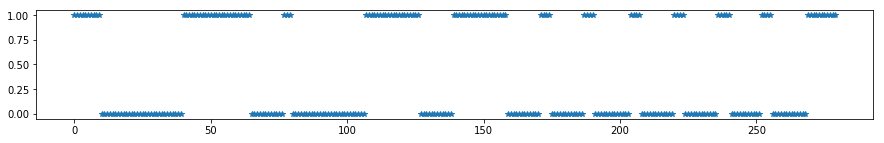

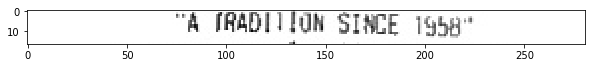

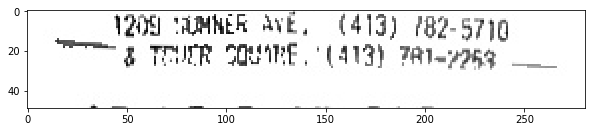

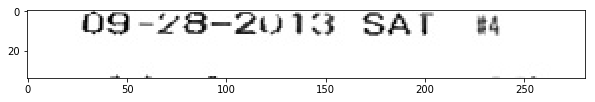

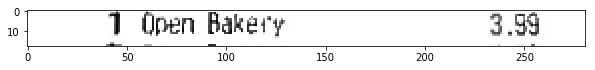

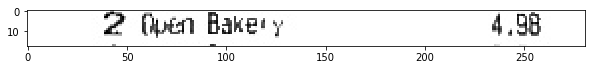

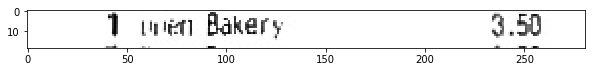

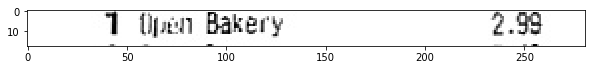

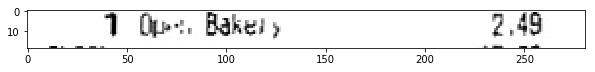

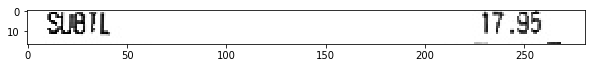

In [155]:
# for image in sample_images_data[5:6]:
if 1:
    i = 5
    image_filename = sample_images[i]
    image = sample_images_data[i]
    collected_text_data = show_image_details(image)


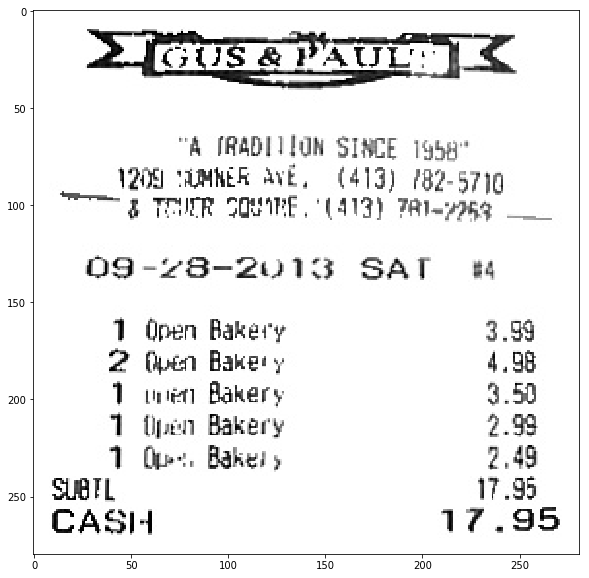

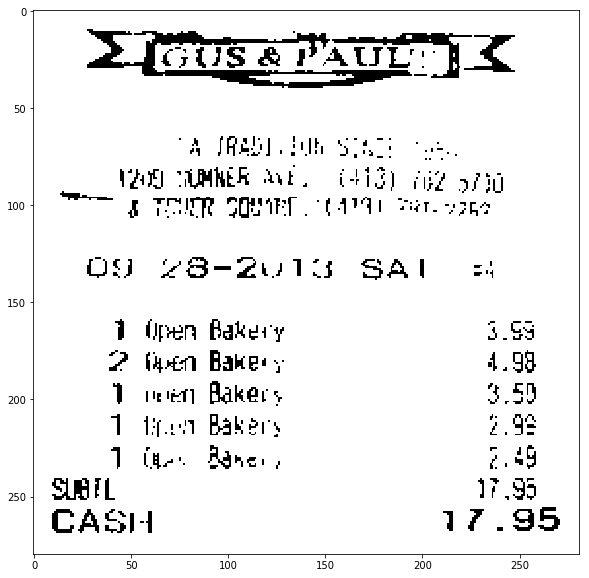

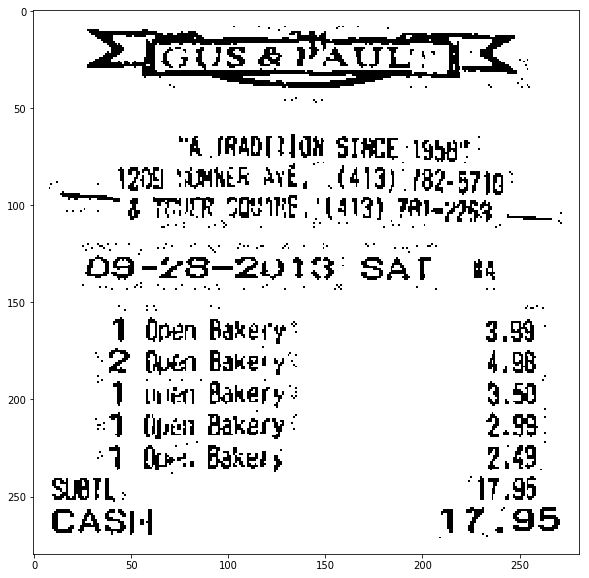

In [156]:
show_img(image)
show_img(get_threshold_image(image))
show_img(get_threshold_image2(image))

# Apply OCR on above Images

# Identify Image size and segregate

In [57]:
def removeExtraLinesFromString(inputstring):
    stringtoreturn = ""
    for line in inputstring.split("\n"):
        if len(line.strip()) > 0: #Only add non empty lines to the stringtoreturn
            stringtoreturn = stringtoreturn + line
    return stringtoreturn


def runCmd(cmd): #string of a command passed in here
    from subprocess import run, PIPE
    stringtoreturn = str( run(cmd, shell=True, stdout=PIPE).stdout.decode('utf-8') )
    stringtoreturn = removeExtraLinesFromString(stringtoreturn)
    return stringtoreturn


def runParallelCmds(listofcommands): 
    from multiprocessing.dummy import Pool #thread pool
    from subprocess import Popen, PIPE, STDOUT
    listofprocesses = [Popen(listofcommands[i], shell=True,stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True) for i in range(len(listofcommands))] 
    #Python calls this list comprehension, it's a way of making a list
    def get_outputs(process): #MultiProcess Thread Pooling require you to map to a function, thus defining a function.
        return process.communicate()[0] #process is object of type subprocess.Popen
    outputs = Pool(len(listofcommands)).map(get_outputs, listofprocesses) #outputs is a list of bytes (which is a type of string)
    listofoutputstrings = []
    for i in range( len(listofcommands) ):
        outputasstring = removeExtraLinesFromString(  outputs[i].decode('utf-8')  ) #.decode('utf-8') converts bytes to string
        listofoutputstrings.append( outputasstring )
    return listofoutputstrings

In [79]:
listofcommands = [
    'sleep 1;echo 1',
    'sleep 2;echo 2',
    'sleep 1.5;echo 1.5', 
]

In [80]:
tot_time = 0
listofcommands = []

for i in range(1, 100):
    cmd = 'sleep {}; echo {}'.format(i * 0.01, i)
    tot_time += i * 0.01
    # print(cmd)
    listofcommands.append(cmd)

print(tot_time)

49.5


In [76]:
%%time

outputs = runParallelCmds(listofcommands)

CPU times: user 342 ms, sys: 1.65 s, total: 1.99 s
Wall time: 4.62 s


In [78]:
%%time

!sleep 4.1

CPU times: user 196 ms, sys: 63.5 ms, total: 259 ms
Wall time: 4.28 s


## Parallel processing

In [27]:
import asyncio
import random
dict = {'router1': {'id': 1, 'name': 'rtr1_core'},
        'router2': {'id': 2, 'name': 'rt2_core'},
        'router3': {'id': 3, 'name': 'rtr3_access'},
        'router4': {'id': 31, 'name': 'rtr3_access'},
        'router5': {'id': 32, 'name': 'rtr3_access'},
        'router6': {'id': 33, 'name': 'rtr3_access'}}

async def process_rtr(id, name):
    """Do your execution here."""
    s_time = await asyncio.sleep(random.randint(0, 5))
    print(f"Processing {id}, {name}")

loop = asyncio.get_event_loop()
tasks = [asyncio.ensure_future(process_rtr(**router_details))
         for router, router_details
         in dict.items()]



loop.is_running(asyncio.wait(tasks))

loop.close()

RuntimeError: This event loop is already running

Processing 3, rtr3_access
Processing 31, rtr3_access
Processing 1, rtr1_core
Processing 2, rt2_core
Processing 32, rtr3_access
Processing 33, rtr3_access


In [ ]:
loop.